In [14]:
import os  # for getting environment variables
import pathlib  # for finding the example dataset
import pvlib
import pandas as pd  # for data wrangling
import matplotlib.pyplot as plt  # for visualization

In [15]:
print(pvlib.__version__)

0.10.1


In [16]:
DATA_DIR = pathlib.Path(pvlib.__file__).parent / 'data'
df_tmy, meta_dict = pvlib.iotools.read_tmy3(DATA_DIR / '723170TYA.CSV', coerce_year=1990)
meta_dict  # display the dictionary of metadata

C:\Users\quean\anaconda3\lib\site-packages\pvlib\iotools\tmy.py:247: pvlibDeprecationWarning: TMY3 variable names will be renamed to pvlib conventions by default starting in pvlib 0.11.0. Specify map_variables=True to enable that behavior now, or specify map_variables=False to hide this warning.
  warnings.warn(


{'USAF': 723170,
 'Name': '"GREENSBORO PIEDMONT TRIAD INT"',
 'State': 'NC',
 'TZ': -5.0,
 'latitude': 36.1,
 'longitude': -79.95,
 'altitude': 273.0}

In [17]:
df_tmy.head(4)

,Date (MM/DD/YYYY),Time (HH:MM),ETR,ETRN,GHI,GHISource,GHIUncertainty,DNI,DNISource,DNIUncertainty,...,Alb,AlbSource,AlbUncertainty,Lprecipdepth,Lprecipquantity,LprecipSource,LprecipUncertainty,PresWth,PresWthSource,PresWthUncertainty
1990-01-01 01:00:00-05:00,01/01/1988,01:00,0,0,0,1,0,0,1,0,...,0.0,?,0,0,1,D,9,0,C,8
1990-01-01 02:00:00-05:00,01/01/1988,02:00,0,0,0,1,0,0,1,0,...,0.0,?,0,0,1,D,9,0,C,8
1990-01-01 03:00:00-05:00,01/01/1988,03:00,0,0,0,1,0,0,1,0,...,0.0,?,0,0,1,D,9,0,C,8
1990-01-01 04:00:00-05:00,01/01/1988,04:00,0,0,0,1,0,0,1,0,...,0.0,?,0,0,1,D,9,0,C,8


In [18]:
print("Number of rows:", len(df_tmy))
print("Number of columns:", len(df_tmy.columns))

Number of rows: 8760
Number of columns: 71


In [19]:
df_tmy.iloc[0];

In [20]:
df_tmy.loc['1990-01-01 01:00:00-05:00'];

In [21]:
df_tmy.keys()

Index(['Date (MM/DD/YYYY)', 'Time (HH:MM)', 'ETR', 'ETRN', 'GHI', 'GHISource',
       'GHIUncertainty', 'DNI', 'DNISource', 'DNIUncertainty', 'DHI',
       'DHISource', 'DHIUncertainty', 'GHillum', 'GHillumSource',
       'GHillumUncertainty', 'DNillum', 'DNillumSource', 'DNillumUncertainty',
       'DHillum', 'DHillumSource', 'DHillumUncertainty', 'Zenithlum',
       'ZenithlumSource', 'ZenithlumUncertainty', 'TotCld', 'TotCldSource',
       'TotCldUncertainty', 'OpqCld', 'OpqCldSource', 'OpqCldUncertainty',
       'DryBulb', 'DryBulbSource', 'DryBulbUncertainty', 'DewPoint',
       'DewPointSource', 'DewPointUncertainty', 'RHum', 'RHumSource',
       'RHumUncertainty', 'Pressure', 'PressureSource', 'PressureUncertainty',
       'Wdir', 'WdirSource', 'WdirUncertainty', 'Wspd', 'WspdSource',
       'WspdUncertainty', 'Hvis', 'HvisSource', 'HvisUncertainty', 'CeilHgt',
       'CeilHgtSource', 'CeilHgtUncertainty', 'Pwat', 'PwatSource',
       'PwatUncertainty', 'AOD', 'AODSource', 'AODU

In [22]:
# GHI, DHI, DNI are irradiance measurements
# DryBulb is the "dry-bulb" (ambient) temperature
# Wspd is wind speed
df = df_tmy[['GHI', 'DHI', 'DNI', 'DryBulb', 'Wspd']]
# show the first 15 rows:
df.head(15)

,GHI,DHI,DNI,DryBulb,Wspd
1990-01-01 01:00:00-05:00,0,0,0,10.0,6.2
1990-01-01 02:00:00-05:00,0,0,0,10.0,5.2
1990-01-01 03:00:00-05:00,0,0,0,10.0,5.7
1990-01-01 04:00:00-05:00,0,0,0,10.0,5.7
1990-01-01 05:00:00-05:00,0,0,0,10.0,5.2
1990-01-01 06:00:00-05:00,0,0,0,10.0,4.1
1990-01-01 07:00:00-05:00,0,0,0,10.0,4.1
1990-01-01 08:00:00-05:00,9,9,1,10.0,5.2
1990-01-01 09:00:00-05:00,46,46,3,10.0,5.2
1990-01-01 10:00:00-05:00,79,78,4,10.6,5.2


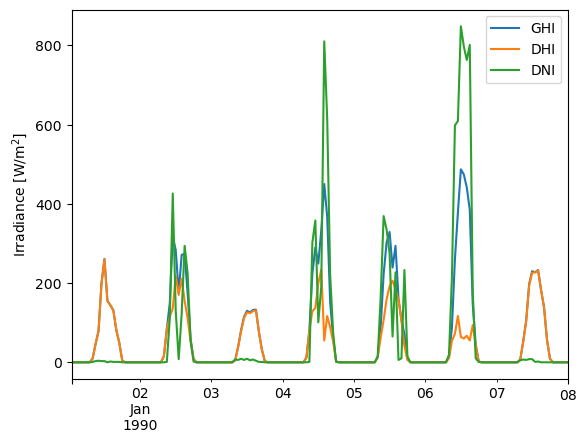

In [23]:
first_week = df.head(24*7)  # Plotting 7 days, each one has 24 hours or entries
first_week[['GHI', 'DHI', 'DNI']].plot()
plt.ylabel('Irradiance [W/m$^2$]');

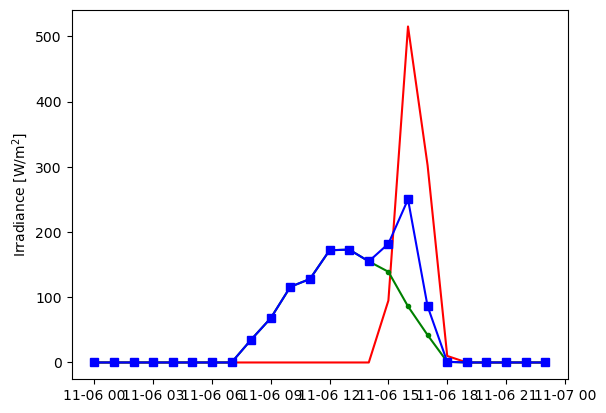

In [24]:
birthday = df.loc['1990-11-06':'1990-11-06']
plt.plot(birthday['DNI'], color='r') 
plt.plot(birthday['DHI'], color='g', marker='.') 
plt.plot(birthday['GHI'], color='b', marker='s') 
plt.ylabel('Irradiance [W/m$^2$]');

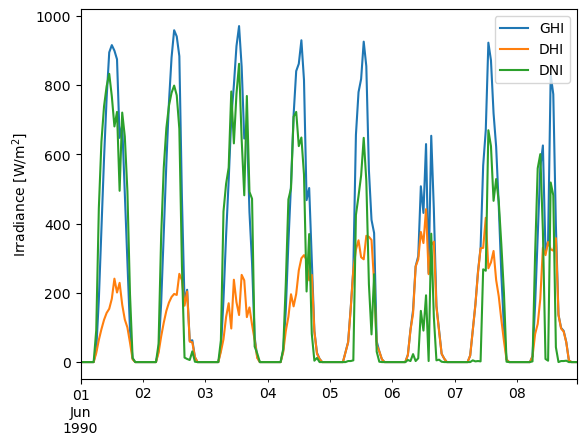

In [25]:
summer_week = df.loc['1990-06-01':'1990-06-08']
summer_week[['GHI', 'DHI', 'DNI']].plot()
plt.ylabel('Irradiance [W/m$^2$]');

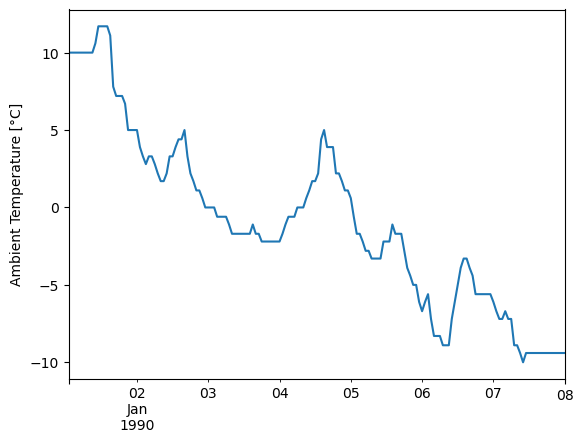

In [26]:
first_week['DryBulb'].plot()
plt.ylabel('Ambient Temperature [°C]');

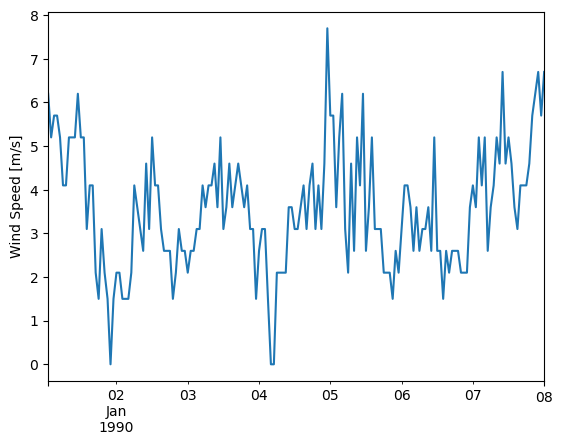

In [27]:
first_week['Wspd'].plot()
plt.ylabel('Wind Speed [m/s]');

In [28]:
# summing hourly irradiance (W/m^2) gives insolation (W h/m^2)
monthly_ghi = df['GHI'].resample('M').sum()
monthly_ghi.head(4)

1990-01-31 00:00:00-05:00     74848
1990-02-28 00:00:00-05:00     85751
1990-03-31 00:00:00-05:00    131766
1990-04-30 00:00:00-05:00    162302
Freq: M, Name: GHI, dtype: int64

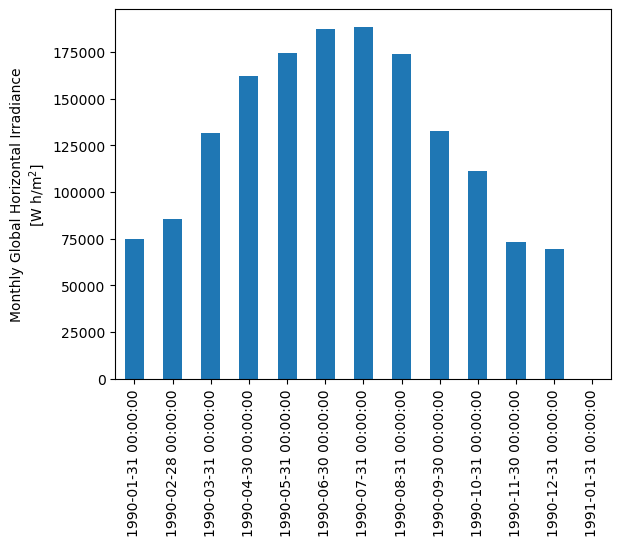

In [29]:
monthly_ghi = monthly_ghi.tz_localize(None)  # don't need timezone for monthly data
monthly_ghi.plot.bar()
plt.ylabel('Monthly Global Horizontal Irradiance\n[W h/m$^2$]');

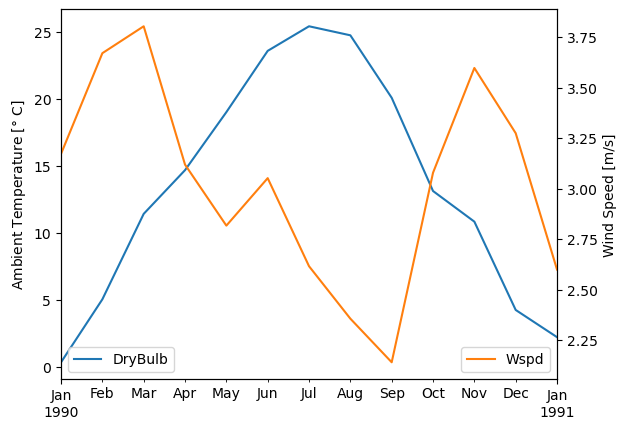

In [30]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()  # add a second y-axis
monthly_average_temp_wind = df[['DryBulb', 'Wspd']].resample('M').mean()
monthly_average_temp_wind['DryBulb'].plot(ax=ax1, c='tab:blue')
monthly_average_temp_wind['Wspd'].plot(ax=ax2, c='tab:orange')
ax1.set_ylabel(r'Ambient Temperature [$\degree$ C]')
ax2.set_ylabel(r'Wind Speed [m/s]')
ax1.legend(loc='lower left')
ax2.legend(loc='lower right');